<a href="https://colab.research.google.com/github/aniketkumar00015-beep/WOC8.0/blob/main/Polynimail_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Polynomial** **Regression**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

**Defining** **Functions**

In [82]:
def add_polnomail_features(X_train,degree):
  X1=X_train[:,0]
  X2=X_train[:,1]
  X3=X_train[:,2]
  X4=X_train[:,3]
  X5=X_train[:,4]
  X6=X_train[:,5]
  X7=X_train[:,6]
  X=[]
  for i in range(0,degree+1):
    for j in range(0,degree+1):
      for k in range(0,degree+1):
        for l in range(0,degree+1):
          for m in range(0,degree+1):
            for n in range(0,degree+1):
              for o in range(0,degree+1):
                if 0<i+j+k+l+m+n+o<=degree:
                  X.append((X1**i)*(X2**j)*(X3**k)*(X4**l)*(X5**m)*(X6**n)*(X7**o))

  return np.array(X).T


In [83]:
def compute_cost(X,y,w,b):
  m=X.shape[0]
  f_x=w@X.T+b   #shape: (1,m)
  f_x=f_x.reshape(m,1)
  cost=np.sum((f_x-y)**2)/(2*m)
  return cost

In [84]:
def compute_gradient(X,y,w,b):
  m,n=X.shape
  dj_dw=np.zeros((1,n))
  dj_db=0
  f_x=w@X.T+b    # Shape: (1, m)
  f_x=f_x.T      # Transpose to (m, 1) to match y shape
  dj_dw=(1/m)*(f_x-y).T@X
  dj_db=(1/m)*(np.sum(f_x-y)) # (f_x-y) is (m,1), transpose to (1,m) then @X gives (1,n)
  return dj_dw,dj_db



In [85]:

def gradient_descent(X,y,w_in,b_in,alpha,iteration):
  cost_history=[]
  w=w_in
  b=b_in
  for i in range(iteration):
    dj_dw,dj_db=compute_gradient(X,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db
    if i<100000:
      cost_history.append(compute_cost(X,y,w,b))
    if i%np.ceil(iteration/10)==0:
      print(f'Iteration {i:4d}: Cost {cost_history[-1]}')
  return w,b,cost_history


In [86]:
def zscore_normalize_features(X):
  mu=np.mean(X,axis=0)
  std_dev=np.std(X,axis=0)
  X_norm=(X-mu)/std_dev
  return X_norm,mu,std_dev

In [87]:
def cost_vs_iteration(j):
  iterations=list(range(1,len(j)+1))
  style.use('ggplot')
  plt.plot(iterations,j)
  plt.title('Cost vs Iteration')
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.show()

In [88]:
def predict(X,wf,bf):
  pred=wf@X.T+bf
  return pred

In [89]:
def r2_score(X,y,w,b):
  f_x=w@X.T+b
  # Flatten both arrays to ensure proper shape matching
  f_x = f_x.flatten()
  y = y.flatten()
  y_mean=np.mean(y)
  ss_res=np.sum((f_x-y)**2)
  ss_tot=np.sum((y-y_mean)**2)
  # Avoid division by zero
  if ss_tot == 0:
    return 0.0
  r2=1-(ss_res/ss_tot)
  return r2


In [90]:
def graphical_analysis(x,y):
  n=x.shape[1]
  style.use('default')
  for i in range(n):
    plt.scatter(x[:,i],y,c='red')
    plt.title(f'Feature {i} and predicted output')
    plt.xlabel(f'Feature {i}')
    plt.ylabel(y)
    plt.show()

In [91]:
def initialize_parameters(X):
  w=np.zeros((1,X.shape[1]))
  b=0
  return w,b

**Reading the given data and visualizing it**

In [92]:
df = pd.read_csv('/content/drive/MyDrive/WOC/poly_train.csv')

df

,x0,x1,x2,x3,x4,x5,x6,y
0,38715.885944,32120.376626,-103.380879,-105.843969,191159.044192,1.239707,-0.873959,2.183619e+40
1,21988.811712,18001.816613,-260.939557,-236.418680,812765.277732,-1.308924,-0.072857,1.191237e+38
2,42941.208162,38465.966211,-200.070650,-167.055603,528232.118765,-0.045137,-0.266585,1.106219e+41
3,34892.612011,31100.113767,-97.738010,-112.905153,629584.854503,-0.170694,-0.513813,1.633086e+40
4,4781.333207,3734.733691,-270.762509,-250.962600,364154.358662,0.379743,-0.439723,8.481798e+31
...,...,...,...,...,...,...,...,...
1195,9679.649897,9484.771066,-205.619892,-202.761704,913783.953043,-0.191966,0.729017,3.727288e+35
1196,11102.232227,10692.896181,-54.586292,-47.845489,364217.680887,1.565789,-0.014281,1.096502e+36
1197,32831.208044,27108.107963,-184.661673,-149.622586,861423.545055,-0.418075,-1.827909,4.742902e+39
1198,14511.052395,12052.582508,-64.921970,-54.856176,919177.400297,0.178612,0.109499,3.220122e+36


In [93]:
df.isnull().sum()

,0
x0,21
x1,25
x2,30
x3,21
x4,12
x5,35
x6,23
y,0


In [94]:
df['x0']=df['x0'].fillna(df['x0'].mean())
df['x1']=df['x1'].fillna(df['x1'].mean())
df['x2']=df['x2'].fillna(df['x2'].mean())
df['x3']=df['x3'].fillna(df['x3'].mean())
df['x4']=df['x4'].fillna(df['x4'].mean())
df['x5']=df['x5'].fillna(df['x5'].mean())
df['x6']=df['x6'].fillna(df['x6'].mean())

In [95]:
df.isnull().sum()

,0
x0,0
x1,0
x2,0
x3,0
x4,0
x5,0
x6,0
y,0


In [96]:
df2=df.to_numpy()

X_train=df2[:,0:7] # Corrected syntax for NumPy array slicing
X_train

array([[ 3.87158859e+04,  3.21203766e+04, -1.03380879e+02, ...,
         1.91159044e+05,  1.23970691e+00, -8.73958850e-01],
       [ 2.19888117e+04,  1.80018166e+04, -2.60939557e+02, ...,
         8.12765278e+05, -1.30892448e+00, -7.28570554e-02],
       [ 4.29412082e+04,  3.84659662e+04, -2.00070650e+02, ...,
         5.28232119e+05, -4.51373805e-02, -2.66584885e-01],
       ...,
       [ 3.28312080e+04,  2.71081080e+04, -1.84661673e+02, ...,
         8.61423545e+05, -4.18074629e-01, -1.82790922e+00],
       [ 1.45110524e+04,  1.20525825e+04, -6.49219704e+01, ...,
         9.19177400e+05,  1.78611841e-01,  1.09499126e-01],
       [ 3.67574785e+04,  3.16281242e+04,  3.39045122e+01, ...,
         3.08334417e+04,  6.06593158e-01, -1.68514662e+00]])

In [97]:
Y_train=df2[:,7]
Y_train

array([2.18361923e+40, 1.19123721e+38, 1.10621887e+41, ...,
       4.74290155e+39, 3.22012159e+36, 1.90025625e+40])

In [98]:
X_norm,mean1,std_deviation1=zscore_normalize_features(X_train)

In [99]:
X_train.max(),X_norm.max()

(np.float64(999522.9290791398), np.float64(4.257627374892887))

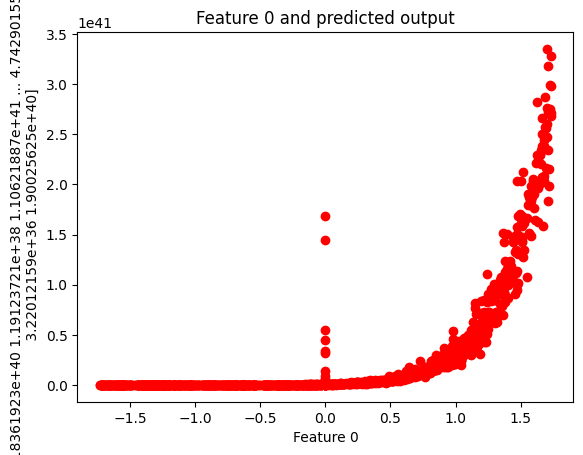

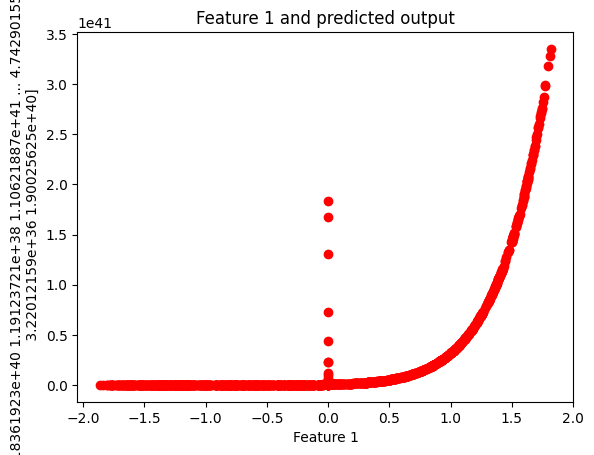

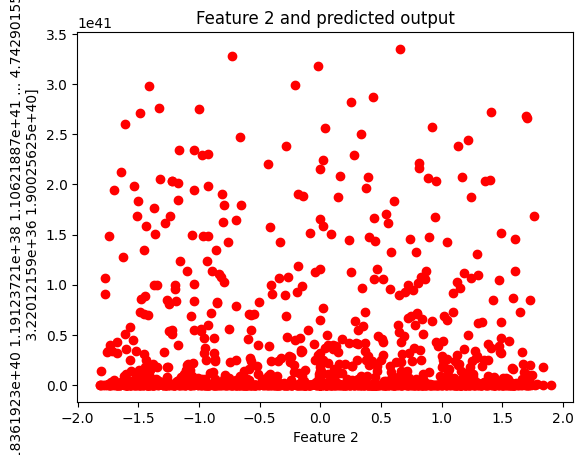

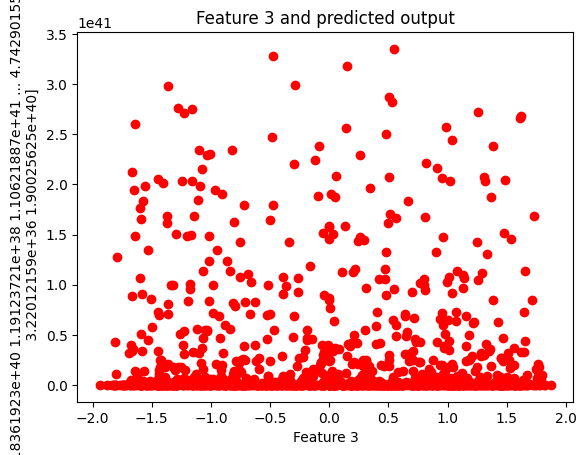

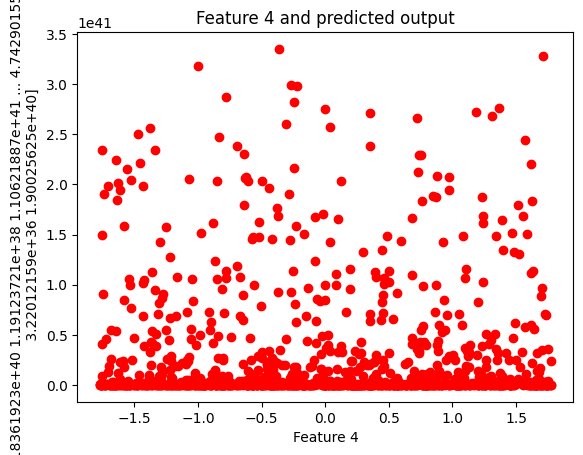

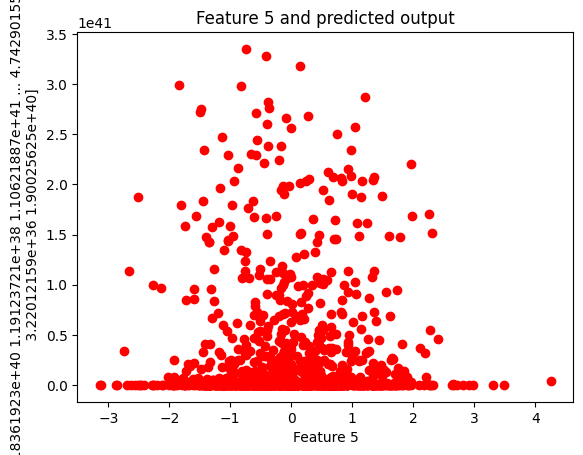

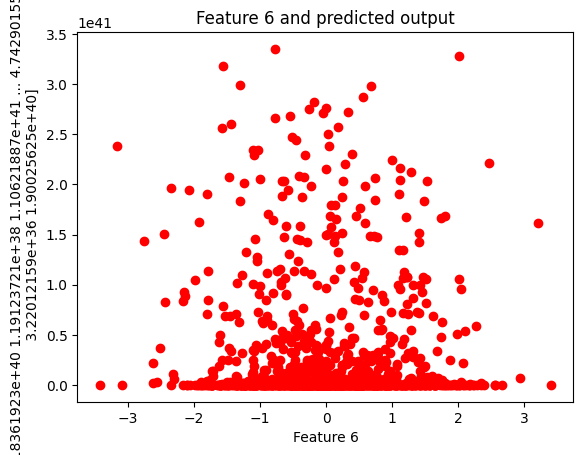

In [100]:
graphical_analysis(X_norm,Y_train)

In [101]:
X_=add_polnomail_features(X_norm,4)
X_f,mean2,std_deviation2=zscore_normalize_features(X_)

In [102]:
X_f.shape,X_f.max()

((1200, 329), np.float64(23.567197443907123))

In [103]:
X_f.max()

np.float64(23.567197443907123)

**Splitting the data into training and cross validation**

In [104]:


X_train_data=X_f[:1000,:]
Y_train_data=Y_train[:1000]
Y_train_data=Y_train_data.reshape(1000,1)

X_cv_data=X_f[1000:,:]
Y_cv_data=Y_train[1000:]
Y_cv_data=Y_cv_data.reshape(200,1)



In [105]:
w,b=initialize_parameters(X_train_data)

**Running Polynomial Regression**

In [106]:
alpha=0.01
iteration=10000
wf,bf,j=gradient_descent(X_train_data,Y_train_data,w,b,alpha,iteration)

Iteration    0: Cost 1.661845758407268e+81
Iteration 1000: Cost 2.830731574755953e+79
Iteration 2000: Cost 2.0644706380586582e+79
Iteration 3000: Cost 1.7552107463143377e+79
Iteration 4000: Cost 1.5692705106220437e+79
Iteration 5000: Cost 1.4392197683367302e+79
Iteration 6000: Cost 1.3413398833206351e+79
Iteration 7000: Cost 1.2643758019876186e+79
Iteration 8000: Cost 1.2020762287549318e+79
Iteration 9000: Cost 1.150603328027189e+79


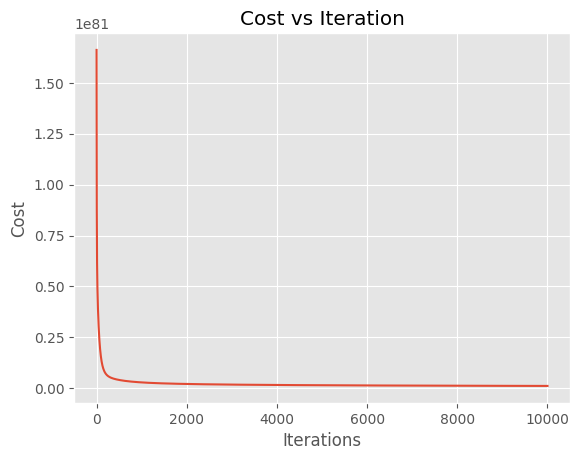

In [107]:
cost_vs_iteration(j)

**Checking cross validation Set and Training set R2 score**

In [108]:
r2_train = r2_score(X_train_data, Y_train_data.T, wf, bf)
print(f'R2 Score on Training Data: {r2_train}')

R2 Score on Training Data: 0.9931923761098802


In [109]:
r2_cv = r2_score(X_cv_data, Y_cv_data.T, wf, bf)
print(f'R2 Score on Cross-Validation Data: {r2_cv}')

R2 Score on Cross-Validation Data: 0.9803367021483642


**Predicting the output for test data**

In [110]:
df_tes=pd.read_csv('/content/drive/MyDrive/WOC/poly_test.csv')
df_test=df_tes.to_numpy()
df_tes

,x0,x1,x2,x3,x4,x5,x6
0,3174.090122,3068.096521,66.048206,88.041572,518895.539006,-1.916558,2.330711
1,6902.381933,5474.606641,-248.355267,-219.375116,661364.700802,0.795611,-2.102040
2,28095.971038,23137.391325,-161.858370,-123.083159,659235.910609,1.064370,0.637355
3,34210.745198,29225.316687,51.384715,33.648105,894826.786228,-0.658700,-0.696247
4,2559.423742,1351.839058,34.768001,36.696550,966655.905518,2.629237,1.882180
...,...,...,...,...,...,...,...
395,49706.250484,40887.795731,-208.697368,-181.016811,226950.973092,0.990310,1.433784
396,38620.401109,32576.175143,-276.759568,-260.870019,198413.873128,0.174052,0.472040
397,20909.191560,17386.627244,-70.719580,-66.361129,338053.622544,1.916927,-0.968535
398,15123.484395,11794.873426,-20.684633,-49.494192,168595.702701,1.097728,0.508979


In [111]:
X_test=(df_test-mean1)/std_deviation1
X_test

array([[-1.51650099, -1.48289089,  1.62921592, ...,  0.05230823,
        -1.98087739,  2.31790459],
       [-1.25765644, -1.28642815, -1.28076847, ...,  0.56273137,
         0.86644488, -2.02423301],
       [ 0.21375329,  0.15552673, -0.48019009, ...,  0.55510457,
         1.14859729,  0.6591637 ],
       ...,
       [-0.28520407, -0.3139543 ,  0.36335165, ..., -0.59559267,
         2.04363882, -0.91389886],
       [-0.68688902, -0.77045405,  0.82645378, ..., -1.20270821,
         1.18361723,  0.53341182],
       [-0.38726984, -0.33371474,  0.48197768, ..., -0.54031538,
        -0.62559783, -0.60217204]])

In [112]:
x_1=add_polnomail_features(X_test,4)
x_1.shape

(400, 329)

In [113]:
x_t=(x_1-mean2)/std_deviation2
x_t.shape

(400, 329)

In [114]:
wf.shape

(1, 329)

In [115]:
Y_predicted= x_t@wf.T+bf
Y_predicted.shape

(400, 1)

In [116]:
Y_predicted


array([[-1.61493350e+40],
       [-5.91143996e+39],
       [ 4.96481894e+38],
       [ 2.22342788e+39],
       [ 5.92536210e+39],
       [-3.60002490e+39],
       [ 4.73054796e+39],
       [ 3.53545244e+39],
       [ 1.94328622e+41],
       [-1.31968826e+39],
       [-2.17089281e+39],
       [ 3.75364220e+39],
       [-2.40762591e+38],
       [-2.99641383e+39],
       [ 4.57025147e+39],
       [ 3.15866953e+39],
       [-3.62200888e+39],
       [-2.12487509e+39],
       [ 8.40041745e+38],
       [-3.78955472e+39],
       [ 7.03825845e+40],
       [-1.67867351e+39],
       [ 1.88858495e+41],
       [ 1.88137665e+41],
       [ 3.40915983e+39],
       [ 8.77120129e+38],
       [ 7.69702046e+40],
       [ 2.96713146e+39],
       [-4.75347254e+39],
       [-2.09098785e+39],
       [ 1.46925272e+39],
       [ 8.00134996e+40],
       [ 9.76626393e+39],
       [ 1.00409306e+41],
       [ 7.33665912e+39],
       [ 3.15269399e+38],
       [ 1.48939426e+39],
       [ 2.63570128e+41],
       [ 1.8

In [117]:
df_pred=pd.DataFrame(Y_predicted,columns=['Predicted'])
df_pred

,Predicted
0,-1.614934e+40
1,-5.911440e+39
2,4.964819e+38
3,2.223428e+39
4,5.925362e+39
...,...
395,2.042895e+41
396,2.327298e+40
397,5.369210e+39
398,2.208237e+39


In [118]:
df_pred.to_csv('Polynomai_Regr_predicted.csv')